<a href="https://colab.research.google.com/github/Sumitjh26997/CSS581-ML/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW 4. Dimensionality reduction and Clustering**

A flavor network is a network that is constructed by considering the ingredients and flavor compounds in a recipe. The code for classification is available online.

## **Q1. Modify the clustering code to visualize clustering for all the various types of cuisines and not just 4.**



The original code is performing a t-SNE(t-Distributed Stochastic Neighbor Embedding) clustering and visualization of recipes based on their ingredients and flavors.

- `tsne_cluster_cuisine:` This function performs t-SNE clustering on a subset of cuisines. It takes a DataFrame and a list of cuisines as input. It subsets the DataFrame for the given cuisines, calculates the cosine distance between the recipes, and applies t-SNE to these distances. The function then plots the t-SNE results, with different cuisines represented by different colors.

- `plot_bokeh:` This function creates an interactive plot using Bokeh. It performs similar steps as the `tsne_cluster_cuisine` function but instead of using Matplotlib for plotting, it uses Bokeh. This allows for interactive plots where you can hover over points to see more information.

- `main:`  the code reads in pickled data files containing information about recipes. It then selects four cuisines and applies the `tsne_cluster_cuisine` function to both the ingredient and flavor data. Finally, it uses the `plot_bokeh` function to create interactive plots for both the ingredient and flavor data.

**Changes made:**

- Print statements have been updated in all functions to be compatible with python3

- `init=random` has been added to both functions to initialize the t-SNE embedding with random config.

- Also changed is the way colors are assigned to the scatter plot. Instead of using a fixed color palette (`['red','green','blue','yellow']`), now a Seaborn color palette is being used that generates as many colors as there are cuisines.

- finally, instead of selecting 4 cuisines all unique cuisines from the dataframe are being added.

(6242, 349) [0, 204, 644, 854, 1044, 1555, 1907, 2357, 2645, 2821, 2959, 3210, 3395, 3779, 4105, 4122, 4309, 4515, 4703, 5073, 5365, 5467, 5643, 5835, 6149, 6242]


<ipython-input-26-4346eab79fe7>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(tsne[lenlist[i]:lenlist[i+1],0],\


(6242, 349) [0, 204, 644, 854, 1044, 1555, 1907, 2357, 2645, 2821, 2959, 3210, 3395, 3779, 4105, 4122, 4309, 4515, 4703, 5073, 5365, 5467, 5643, 5835, 6149, 6242]


ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : fill_color='color' [no close matches], hatch_color='color' [no close matches], line_color='color' [no close matches] {renderer: GlyphRenderer(id='p1153', ...)}


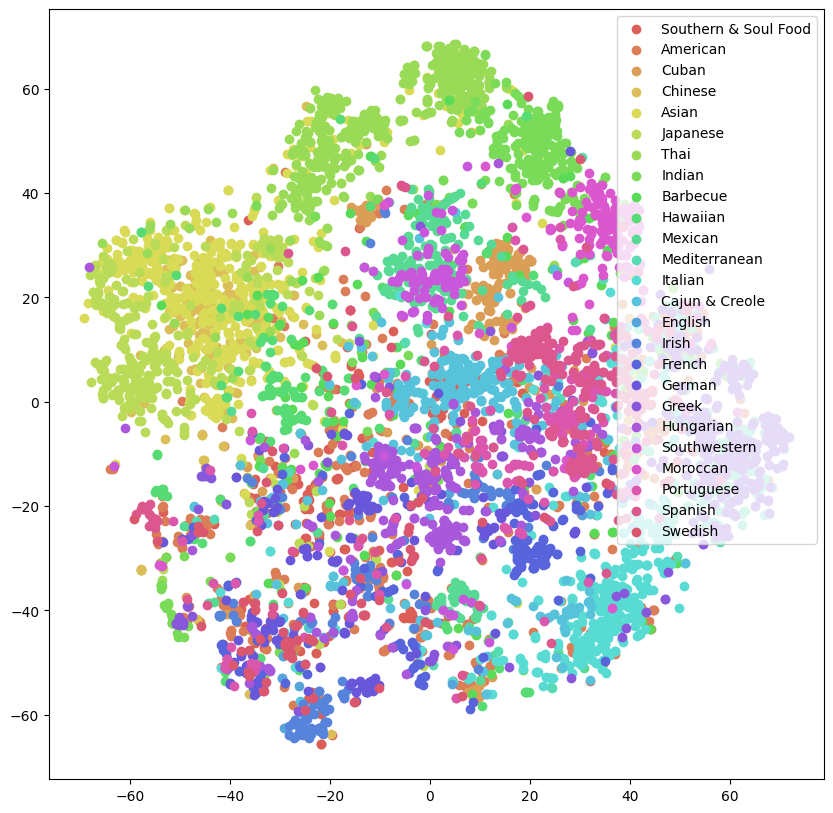

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS, TSNE

from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool

#take some regional cuisines, tsne clustering, and plotting
def tsne_cluster_cuisine(df,sublist):
    lenlist=[0]
    df_sub = df[df['cuisine']==sublist[0]]
    lenlist.append(df_sub.shape[0])
    for cuisine in sublist[1:]:
        temp = df[df['cuisine']==cuisine]
        df_sub = pd.concat([df_sub, temp],axis=0,ignore_index=True)
        lenlist.append(df_sub.shape[0])
    df_X = df_sub.drop(['cuisine','recipeName'],axis=1)
    print(df_X.shape, lenlist)

    dist = squareform(pdist(df_X, metric='cosine'))
    tsne = TSNE(metric='precomputed',init='random').fit_transform(dist)

    palette = sns.color_palette("hls", len(sublist))
    plt.figure(figsize=(10,10))
    for i,cuisine in enumerate(sublist):
        plt.scatter(tsne[lenlist[i]:lenlist[i+1],0],\
        tsne[lenlist[i]:lenlist[i+1],1],c=palette[i],label=sublist[i])
    plt.legend()

#interactive plot with boken; set up for four categories, with color palette; pass in df for either ingredient or flavor
def plot_bokeh(df,sublist,filename):
    lenlist=[0]
    df_sub = df[df['cuisine']==sublist[0]]
    lenlist.append(df_sub.shape[0])
    for cuisine in sublist[1:]:
        temp = df[df['cuisine']==cuisine]
        df_sub = pd.concat([df_sub, temp],axis=0,ignore_index=True)
        lenlist.append(df_sub.shape[0])
    df_X = df_sub.drop(['cuisine','recipeName'],axis=1)
    print(df_X.shape, lenlist)

    dist = squareform(pdist(df_X, metric='cosine'))
    tsne = TSNE(metric='precomputed',init='random').fit_transform(dist)
    #cannot use seaborn palette for bokeh
    palette = sns.color_palette("hls",len(sublist))
    colors =[]
    for i in range(len(sublist)):
        for j in range(lenlist[i+1]-lenlist[i]):
            colors.append(palette[i])
    #plot with boken
    output_file(filename)
    source = ColumnDataSource(
            data=dict(x=tsne[:,0],y=tsne[:,1],
                cuisine = df_sub['cuisine'],
                recipe = df_sub['recipeName']))

    hover = HoverTool(tooltips=[
                ("cuisine", "@cuisine"),
                ("recipe", "@recipe")])

    p = figure(tools=[hover], title="flavor clustering")
    p.circle('x', 'y', color='color', source=source)
    show(p)


if __name__ == '__main__':
    yum_ingr = pd.read_pickle('yummly_ingr.pkl')
    yum_ingrX = pd.read_pickle('yummly_ingrX.pkl')

    #select all cuisines and plot tsne clustering with ingredients
    sublist = yum_ingr.cuisine.unique()
    df_ingr = yum_ingrX.copy()
    df_ingr['cuisine'] = yum_ingr['cuisine']
    df_ingr['recipeName'] = yum_ingr['recipeName']
    tsne_cluster_cuisine(df_ingr,sublist)
    plot_bokeh(df_ingr, sublist, 'plot.html')

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca_df = df_ingr.drop(['cuisine', 'recipeName'], axis=1).values
scaled_df = StandardScaler().fit_transform(pca_df)
pca = PCA(n_components = 0.95).fit(scaled_df)
pca_reduced_df = pca.transform(scaled_df)

print('Original components: ',scaled_df.shape[-1])
print('Number of components required to explain 95% of variability: ', pca_reduced_df.shape[-1])

Original components:  349
Number of components required to explain 95% of variability:  292


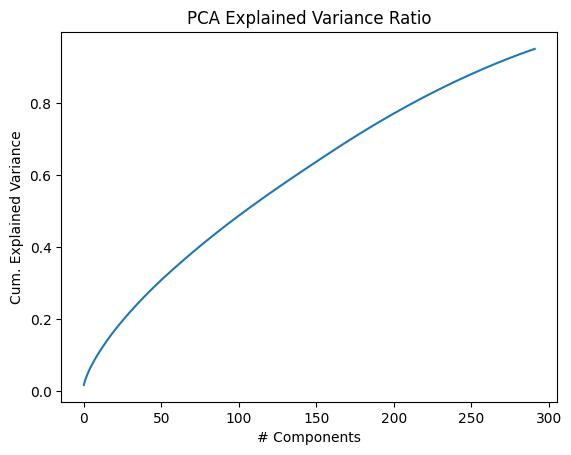

In [23]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.axvline(x=pca_reduced_df.shape[-1], color='red', linestyle='--', label=f'{pca_reduced_df.shape[-1]} Components (95%)')
plt.xlabel('# Components')
plt.ylabel('Cum. Explained Variance')
plt.title('PCA Explained Variance Ratio')
# plt.legend()
plt.show()

In [4]:
exp_var = pca.explained_variance_ratio_
for i, var in enumerate(exp_var):
  print("Component", i+1, "explains", round(var*100, 2), "% of the variability.")

Component 1 explains 1.7 % of the variability.
Component 2 explains 1.46 % of the variability.
Component 3 explains 1.17 % of the variability.
Component 4 explains 1.02 % of the variability.
Component 5 explains 0.95 % of the variability.
Component 6 explains 0.84 % of the variability.
Component 7 explains 0.79 % of the variability.
Component 8 explains 0.77 % of the variability.
Component 9 explains 0.76 % of the variability.
Component 10 explains 0.71 % of the variability.
Component 11 explains 0.69 % of the variability.
Component 12 explains 0.67 % of the variability.
Component 13 explains 0.64 % of the variability.
Component 14 explains 0.63 % of the variability.
Component 15 explains 0.63 % of the variability.
Component 16 explains 0.63 % of the variability.
Component 17 explains 0.6 % of the variability.
Component 18 explains 0.59 % of the variability.
Component 19 explains 0.58 % of the variability.
Component 20 explains 0.56 % of the variability.
Component 21 explains 0.55 % of

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
silhouette_scores = []
for k in range(2, 25):
  kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(pca_reduced_df)
  inertias.append(kmeans.inertia_)
  silhouette_avg = silhouette_score(pca_reduced_df, kmeans.labels_)
  silhouette_scores.append(silhouette_avg)
  print(f"# Clusters: {k}, Silhouette score: {silhouette_avg}")



Number of clusters: 2, silhouette score: 0.04715308186934413
Number of clusters: 3, silhouette score: 0.01376297193972259
Number of clusters: 4, silhouette score: 0.02271808742483613
Number of clusters: 5, silhouette score: 0.00906531857030012
Number of clusters: 6, silhouette score: 0.01890662705735798
Number of clusters: 7, silhouette score: 0.011374027600964998
Number of clusters: 8, silhouette score: 0.0074404894844562145
Number of clusters: 9, silhouette score: 0.008251190099760775
Number of clusters: 10, silhouette score: 0.00952032790972044
Number of clusters: 11, silhouette score: 0.014732813391869668
Number of clusters: 12, silhouette score: 0.01706659802355533
Number of clusters: 13, silhouette score: 0.020796241072386035
Number of clusters: 14, silhouette score: 0.01181729792410966
Number of clusters: 15, silhouette score: 0.016928451263230605
Number of clusters: 16, silhouette score: 0.0071088889418182005
Number of clusters: 17, silhouette score: 0.022064511701956974
Number

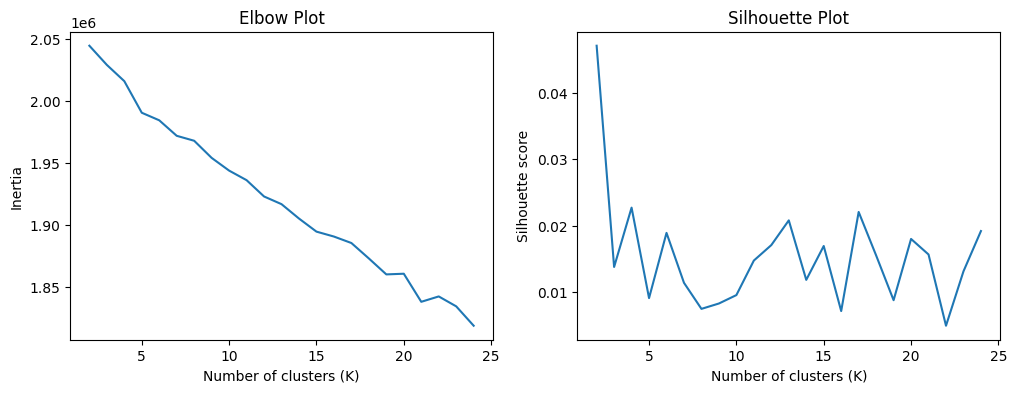

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Elbow plot
sns.lineplot(x=range(2, 25), y=inertias, ax=ax[0])
ax[0].set_title("Elbow Plot")
ax[0].set_xlabel("Number of clusters (K)")
ax[0].set_ylabel("Inertia")

# Silhouette plot
sns.lineplot(x=range(2, 25), y=silhouette_scores, ax=ax[1])
ax[1].set_title("Silhouette Plot")
ax[1].set_xlabel("Number of clusters (K)")
ax[1].set_ylabel("Silhouette score")
plt.show()